# Install missing python modules

In [1]:
import sys
!{sys.executable} -m pip install skrebate

# Global imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from ReliefF import ReliefF
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Pair plot of phenotype data (=discovering pairwise correlation)

In [3]:
# growth_df=pd.read_csv('SV_dataframe_50kb_1kb_5', delimiter=" ")
# #factorize sex and population to use in PP
# growth_df['sex'] = pd.factorize(growth_df.sex)[0]
# growth_df['population'] = pd.factorize(growth_df.population)[0]
# # Slicing out the phenotype data
# data=growth_df.iloc[:, 0:9]
# # Exclude indv from pairing, by putting it as index
# data=data.set_index('indv')
# # Sex 0 = male, sex 1 = unknown and sex 2 = female
# # pop 0 = 2013B12, pop 1 = 2013B11, pop 2 = 2013B9 and pop 3 = 2013B10
# sns.pairplot(data, hue="age", palette="tab10")

# Categorising fork_length


#### Load growth data for SV's

In [2]:
growth_df=pd.read_csv('SV_growth_50kb_1kb_5', delimiter=" ")  

#### Split data in year 1 and year 3 data

In [3]:
growth_y1 = growth_df.loc[(growth_df['age'] == 1)]
growth_y3 = growth_df.loc[(growth_df['age'] == 3)]

#### Bin into small --> medium --> big

##### Year 1

In [4]:
small=growth_y1.loc[(growth_y1['fork_length'] >= min(growth_y1.fork_length)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y1.loc[(growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.33)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y1.loc[growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y1=small_medium.append(big)

<ipython-input-4-500e8c2916d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-4-500e8c2916d0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-4-500e8c2916d0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

##### Year 3

In [5]:
small=growth_y3.loc[(growth_y3['fork_length'] >= min(growth_y3.fork_length)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.33))]
small['fork_length']="small"
small


medium=growth_y3.loc[(growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.33)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.66))]
medium['fork_length']="medium"
medium

big=growth_y3.loc[growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.66)]
big['fork_length']="big"
big

small_medium=small.append(medium)
binned_y3=small_medium.append(big)


<ipython-input-5-3ebd253edfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['fork_length']="small"
<ipython-input-5-3ebd253edfbf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['fork_length']="medium"
<ipython-input-5-3ebd253edfbf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [8]:
binned_y3

,indv,sex,population,fork_length,age,spot_count,disease,deformity,nostril_count,LG1_dels_50000,...,LG25_ins_3700000,LG25_invs_3700000,LG25_dels_3750000,LG25_dups_3750000,LG25_ins_3750000,LG25_invs_3750000,LG25_dels_3800000,LG25_dups_3800000,LG25_ins_3800000,LG25_invs_3800000
5,140942470,unknown,2013B9,243.107968,3,36.0,2.0,0.0,1.0,4,...,0,0,0,0,0,0,2,0,0,0
6,197458872,unknown,2013B9,188.976484,3,43.0,2.0,1.0,1.5,4,...,0,0,0,0,0,0,1,0,0,0
13,261931510,male,2013B10,227.704511,3,24.0,2.0,0.0,2.0,3,...,1,0,2,0,0,0,1,0,0,0
19,279192515,unknown,2013B12,238.171605,3,38.0,2.0,0.0,2.0,4,...,1,0,2,0,0,0,1,0,0,0
29,453817879,unknown,2013B11,252.323128,3,73.0,2.0,0.0,1.0,3,...,0,0,0,0,0,0,1,0,1,0
37,592865129,unknown,2013B11,246.482552,3,54.0,2.0,0.0,1.0,5,...,0,0,1,0,0,0,1,0,0,0
39,636039763,unknown,2013B11,251.660147,3,27.0,2.0,0.0,2.0,5,...,1,0,1,0,0,0,0,0,0,0
53,853067240,unknown,2013B11,250.148853,3,30.0,2.0,0.0,2.0,4,...,1,0,1,0,0,0,0,0,0,0
57,985661182,unknown,2013B9,249.555651,3,36.0,2.0,0.0,2.0,4,...,1,0,1,0,0,0,1,0,0,0
59,986994303,male,2013B12,250.116536,3,40.0,2.0,0.0,1.0,4,...,0,0,1,0,0,0,2,0,0,0


In [9]:
# small=growth_y1.loc[(growth_y1['fork_length'] >= min(growth_y1.fork_length)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.33))]

# medium=growth_y1.loc[(growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.33)) & (growth_y1['fork_length'] <= growth_y1.fork_length.quantile(0.66))]

# big=growth_y1.loc[growth_y1['fork_length'] > growth_y1.fork_length.quantile(0.66)]

# small_medium=small.append(medium)
# binned_y1=small_medium.append(big)

# sns.kdeplot(binned_y1['fork_length'], shade=True, legend=True, bw=20)
# points = sns.kdeplot(binned_y1['fork_length'], shade=True, bw=20).get_lines()[0].get_data()

# x = points[0]
# y = points[1]
# plt.fill_between(x,y, where = x <= small['fork_length'].max(), color='r')
# plt.fill_between(x,y, where = (x <=medium['fork_length'].max()) & (x > small['fork_length'].max()), color='g')
# plt.fill_between(x,y, where = (x >medium['fork_length'].max()), color='blue')

# leg = ax.legend();
# red_patch = mpatches.Patch(color='red', label='small')
# green_patch = mpatches.Patch(color='green', label='medium')
# blue_patch = mpatches.Patch(color='blue', label='big')
# plt.legend(title= "Bins",handles=[red_patch, green_patch, blue_patch])
# plt.title("Growth distribution year 1")
# plt.xlabel("Fork length in centimeters")
# plt.ylabel("Density")

In [10]:
# # import matplotlib.patches as mpatches

# small=growth_y3.loc[(growth_y3['fork_length'] >= min(growth_y3.fork_length)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.33))]

# medium=growth_y3.loc[(growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.33)) & (growth_y3['fork_length'] <= growth_y3.fork_length.quantile(0.66))]

# big=growth_y3.loc[growth_y3['fork_length'] > growth_y3.fork_length.quantile(0.66)]

# small_medium=small.append(medium)
# binned_y3=small_medium.append(big)

# ax=sns.kdeplot(binned_y3['fork_length'], shade=True, legend=True, bw=20, color="green")
# points = sns.kdeplot(binned_y3['fork_length'], shade=True, bw=20).get_lines()[0].get_data()

# x = points[0]
# y = points[1]
# plt.fill_between(x,y, where = (x <small['fork_length'].max()), color='orange')
# plt.fill_between(x,y, where = (x <medium['fork_length'].max()) & (x >= small['fork_length'].max()), color='purple')
# plt.fill_between(x,y, where = (x >=medium['fork_length'].max()), color='black')

# # # leg = ax.legend();
# red_patch = mpatches.Patch(color='orange', label='small')
# green_patch = mpatches.Patch(color='purple', label='medium')
# blue_patch = mpatches.Patch(color='black', label='big')
# plt.legend(title= "Bins",handles=[red_patch, green_patch, blue_patch])
# plt.title("Growth distribution year 3")
# plt.xlabel("Fork length in centimeters")
# plt.ylabel("Density")

In [11]:
medium['fork_length'].max()

264.152365659

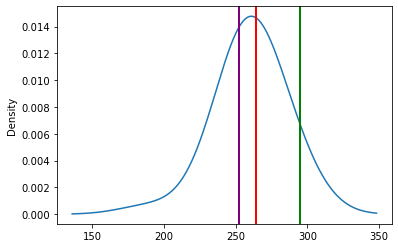

In [12]:
import numpy as np
import matplotlib.pyplot as plt
s = pd.Series(binned_y3['fork_length'])
ax = s.plot.kde(bw_method=1)
plt.axvline(small['fork_length'].max(), linestyle='solid',
            linewidth=2, c="purple")
plt.axvline(medium['fork_length'].max(), linestyle='solid',
            linewidth=2, c="red")
plt.axvline(big['fork_length'].max(), linestyle='solid',
            linewidth=2, c="green")

# Do relief F feature selection

## Overview of target

In [13]:
print(binned_y1['fork_length'].value_counts())
print(binned_y3['fork_length'].value_counts())

small     11
big       11
medium    10
Name: fork_length, dtype: int64
293.251201    1
249.555651    1
188.976484    1
282.035539    1
246.482552    1
253.522367    1
264.152366    1
250.148853    1
277.517262    1
267.439759    1
283.483691    1
252.323128    1
271.002148    1
250.116536    1
260.679829    1
227.704511    1
260.368211    1
272.716241    1
259.561722    1
268.211388    1
251.660147    1
238.171605    1
295.083054    1
243.107968    1
294.314561    1
257.742386    1
263.937463    1
268.182385    1
262.191716    1
258.806908    1
252.747106    1
Name: fork_length, dtype: int64


In [14]:
x=binned_y1
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)
x_train

,indv,sex,population,fork_length,age,spot_count,disease,deformity,nostril_count,LG1_dels_50000,...,LG25_ins_3700000,LG25_invs_3700000,LG25_dels_3750000,LG25_dups_3750000,LG25_ins_3750000,LG25_invs_3750000,LG25_dels_3800000,LG25_dups_3800000,LG25_ins_3800000,LG25_invs_3800000
42,650616751,unknown,2013B10,big,1,43.0,0.0,0.0,2.0,4,...,2,0,3,0,0,0,0,0,0,0
30,453817879,unknown,2013B11,small,1,62.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,1,0,1,0
48,750067070,unknown,2013B10,big,1,55.0,0.0,0.0,2.0,2,...,0,0,2,0,0,0,1,0,0,0
24,305981370,unknown,2013B10,big,1,44.0,0.0,0.0,1.0,1,...,1,0,1,0,0,0,1,0,0,0
50,808141137,male,2013B12,medium,1,54.0,0.0,0.0,2.0,4,...,1,0,2,0,0,0,1,0,0,0
10,220020828,unknown,2013B12,small,1,49.0,0.0,0.0,1.0,4,...,0,0,1,0,0,0,1,0,1,0
33,504243687,unknown,2013B11,small,1,57.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,2,0,1,0
44,661305928,unknown,2013B9,big,1,50.0,0.0,0.0,1.0,2,...,1,0,5,0,0,0,0,0,0,0
27,397065822,unknown,2013B9,big,1,49.0,0.0,0.0,2.0,1,...,0,0,1,0,0,0,1,0,1,0
52,808177555,unknown,2013B9,medium,1,68.0,0.0,0.0,1.0,3,...,1,0,4,0,0,0,1,0,1,0


## Start with year 1

In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
genetic_data=binned_y1
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs1 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs1.fit(features, labels, headers)
reliefdict1={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs1.feature_importances_):
    reliefdict1[feature_score]=feature_name

Created distance array in 1.2334213256835938 seconds.
Feature scoring under way ...
Completed scoring in 212.99706840515137 seconds.
Created distance array in 0.5529742240905762 seconds.
Feature scoring under way ...
Completed scoring in 103.11015796661377 seconds.
Created distance array in 0.2809748649597168 seconds.
Feature scoring under way ...
Completed scoring in 54.788496017456055 seconds.


## Get top 25 scores year 1

In [8]:
# print(reliefdict)
y1_relief_top=[]
for value in fs1.top_features_[0:25]:
    score=fs1.feature_importances_[value]
    y1_relief_top.append(reliefdict1[score])
    
print(y1_relief_top)

['LG19_dups_25750000', 'LG2_ins_16200000', 'LG21_dels_21450000', 'LG9_dels_14850000', 'LG13_ins_17400000', 'LG21_ins_21450000', 'LG21_ins_21450000', 'LG14_dels_9850000', 'LG19_ins_12300000', 'LG14_invs_8900000', 'LG8_dels_7650000', 'LG20_dels_10450000', 'LG12_dels_9500000', 'LG19_dels_19450000', 'LG10_dels_30400000', 'LG6_dels_21700000', 'LG8_dels_150000', 'LG2_dels_28250000', 'LG8_ins_26150000', 'LG22_dels_27550000', 'LG8_dels_4450000', 'LG5_dels_21100000', 'LG20_dels_19750000', 'LG3_dels_7850000', 'LG11_ins_950000']


## Get prediction year 1

In [23]:
x

,indv,sex,population,fork_length,age,spot_count,disease,deformity,nostril_count,LG1_dels_50000,...,LG25_ins_3700000,LG25_invs_3700000,LG25_dels_3750000,LG25_dups_3750000,LG25_ins_3750000,LG25_invs_3750000,LG25_dels_3800000,LG25_dups_3800000,LG25_ins_3800000,LG25_invs_3800000
4,140942470,0,0,small,1,44.0,0.0,0.0,1.0,4,...,0,0,0,0,0,0,2,0,0,0
7,197458872,0,0,small,1,56.0,0.0,1.0,1.5,4,...,0,0,0,0,0,0,1,0,0,0
10,220020828,0,1,small,1,49.0,0.0,0.0,1.0,4,...,0,0,1,0,0,0,1,0,1,0
14,261931510,1,2,small,1,34.0,0.0,0.0,2.0,3,...,1,0,2,0,0,0,1,0,0,0
20,279192515,0,1,small,1,47.0,0.0,0.0,2.0,4,...,1,0,2,0,0,0,1,0,0,0
30,453817879,0,3,small,1,62.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,1,0,1,0
31,498476286,0,0,small,1,47.0,0.0,0.0,2.0,3,...,1,0,3,0,0,0,1,0,0,0
33,504243687,0,3,small,1,57.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,2,0,1,0
38,592865129,0,3,small,1,42.0,2.0,0.0,1.0,5,...,0,0,1,0,0,0,1,0,0,0
58,985661182,0,0,small,1,35.0,0.0,0.0,2.0,4,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
x=binned_y1[y1_relief_top]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with TuRF Relief-F top",str(len(y1_relief_top)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

# sv = svm.SVC(kernel='linear')
# sv.fit(x_train, y_train)
# pred_svm = sv.predict(x_test)
# print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with TuRF Relief-F top 15 features and year 1 data ---

KNN 0.3125
Naive Bayes 0.25
Logistic regression 0.25
Random forest 0.25


In [14]:
x

,indv,sex,population,age,spot_count,disease,deformity,nostril_count,LG1_dels_50000,LG1_dups_50000,...,LG25_ins_3700000,LG25_invs_3700000,LG25_dels_3750000,LG25_dups_3750000,LG25_ins_3750000,LG25_invs_3750000,LG25_dels_3800000,LG25_dups_3800000,LG25_ins_3800000,LG25_invs_3800000
4,140942470,unknown,2013B9,1,44.0,0.0,0.0,1.0,4,1,...,0,0,0,0,0,0,2,0,0,0
7,197458872,unknown,2013B9,1,56.0,0.0,1.0,1.5,4,1,...,0,0,0,0,0,0,1,0,0,0
10,220020828,unknown,2013B12,1,49.0,0.0,0.0,1.0,4,1,...,0,0,1,0,0,0,1,0,1,0
14,261931510,male,2013B10,1,34.0,0.0,0.0,2.0,3,1,...,1,0,2,0,0,0,1,0,0,0
20,279192515,unknown,2013B12,1,47.0,0.0,0.0,2.0,4,1,...,1,0,2,0,0,0,1,0,0,0
30,453817879,unknown,2013B11,1,62.0,0.0,0.0,1.0,3,1,...,0,0,0,0,0,0,1,0,1,0
31,498476286,unknown,2013B9,1,47.0,0.0,0.0,2.0,3,1,...,1,0,3,0,0,0,1,0,0,0
33,504243687,unknown,2013B11,1,57.0,0.0,0.0,1.0,3,1,...,0,0,0,0,0,0,2,0,1,0
38,592865129,unknown,2013B11,1,42.0,2.0,0.0,1.0,5,1,...,0,0,1,0,0,0,1,0,0,0
58,985661182,unknown,2013B9,1,35.0,0.0,0.0,2.0,4,1,...,1,0,1,0,0,0,1,0,0,0


In [13]:
x=binned_y1.drop('fork_length',1)
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with all features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

# sv = svm.SVC(kernel='linear')
# sv.fit(x_train, y_train)
# pred_svm = sv.predict(x_test)
# print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with all features and year 1 data ---



ValueError: could not convert string to float: 'unknown'

In [6]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
x=binned_y3.drop('fork_length',1)
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with all features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor


binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
x=binned_y1.drop('fork_length',1)
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with all features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

# sv = svm.SVC(kernel='linear')
# sv.fit(x_train, y_train)
# pred_svm = sv.predict(x_test)
# print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with all features and year 3 data ---

KNN 0.375
Naive Bayes 0.4375
Logistic regression 0.3125
Random forest 0.3125
--- Classifiers with all features and year 1 data ---

KNN 0.3125
Naive Bayes 0.25
Logistic regression 0.25
Random forest 0.25


array(['big', 'big', 'big', 'big', 'big', 'big', 'big', 'big', 'big',
       'big', 'big', 'big', 'big', 'big', 'big', 'big'], dtype=object)

In [22]:
x=binned_y1.drop('fork_length')
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with TuRF Relief-F top",str(len(y1_relief_top)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

KeyError: "['fork_length'] not found in axis"

## Now do year 3

In [9]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from skrebate.turf import TuRF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
genetic_data=binned_y3
features, labels = genetic_data.drop('fork_length', axis=1).values, genetic_data['fork_length'].values
headers = list(genetic_data.drop("fork_length", axis=1))
fs3 = TuRF(core_algorithm="ReliefF", n_features_to_select=2, pct=0.5,verbose=True)
fs3.fit(features, labels, headers)
reliefdict3={}
for feature_name, feature_score in zip(genetic_data.drop('fork_length', axis=1).columns, fs3.feature_importances_):
    reliefdict3[feature_score]=feature_name

Created distance array in 1.2320144176483154 seconds.
Feature scoring under way ...
Completed scoring in 188.56587195396423 seconds.
Created distance array in 0.5910313129425049 seconds.
Feature scoring under way ...
Completed scoring in 97.25450992584229 seconds.
Created distance array in 0.3090364933013916 seconds.
Feature scoring under way ...
Completed scoring in 48.910919189453125 seconds.


## Get top 25 year 3

In [10]:
# print(reliefdict)
y3_relief_top=[]
for value in fs3.top_features_[0:25]:
    score=fs3.feature_importances_[value]
    y3_relief_top.append(reliefdict3[score])
    
print(y3_relief_top)

['LG11_dels_31250000', 'LG3_dels_19750000', 'LG24_ins_10650000', 'LG23_dels_15600000', 'LG10_ins_16750000', 'LG14_dels_8550000', 'LG22_dels_18600000', 'LG14_ins_21900000', 'LG19_ins_9550000', 'LG8_dels_13300000', 'LG14_dels_27150000', 'LG9_dels_11550000', 'LG18_dels_30550000', 'LG7_ins_25200000', 'LG2_dels_14300000', 'LG3_dels_14250000', 'LG19_dups_25750000', 'LG19_ins_17800000', 'LG10_invs_2050000', 'LG6_ins_25050000', 'LG6_ins_25050000', 'LG5_dels_33200000', 'LG15_dels_12800000', 'LG14_dels_21900000', 'LG18_ins_28200000']


## Get prediction year 3

In [20]:
x=binned_y3[y3_relief_top]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with TuRF Relief-F top",str(len(y3_relief_top)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

--- Classifiers with TuRF Relief-F top 15 features and year 3 data ---



ValueError: Unknown label type: 'continuous'

In [ ]:
x=binned_y3
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

print("--- Classifiers with TuRF Relief-F top",str(len(y3_relief_top)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

# Year 1 chi-square feature selection 

In [ ]:
binned_y1['sex'] = pd.factorize(binned_y1.sex)[0]
binned_y1['population'] = pd.factorize(binned_y1.population)[0]
y = binned_y1.fork_length
X = binned_y1.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
var=str(featureScores.nlargest(35,'Score'))
var.split()
data_list=[]
for values in var.split():
    if "LG" in values:
        data_list.append(values)
x=X[data_list]
y = binned_y1.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

# Year 1 prediction

In [ ]:
print("--- Classifiers with chi-square top",str(len(data_list)), "features and year 1 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))

# Year 3 feature selection

In [ ]:
binned_y3['sex'] = pd.factorize(binned_y3.sex)[0]
binned_y3['population'] = pd.factorize(binned_y3.population)[0]
y = binned_y3.fork_length
X = binned_y3.drop(columns=["fork_length"])
bestfeatures = SelectKBest(score_func=chi2, k=15)
bestfeatures
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
var=str(featureScores.nlargest(35,'Score'))
var.split()
data_list=[]
for values in var.split():
    if "LG" in values:
        data_list.append(values)
x=X[data_list]
y = binned_y3.fork_length
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=2)

# Year 3 prediction

In [ ]:
print("--- Classifiers with chi-square top",str(len(data_list)), "features and year 3 data ---\n")
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("KNN", accuracy_score(y_test, y_pred))


classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Naive Bayes", accuracy_score(y_test, y_pred))

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred = clf.predict(x_test)
print("Logistic regression", accuracy_score(y_test, pred))

ranfor = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 5, max_depth = 200)
ranfor.fit(x_train, y_train)
pred_ranfor = ranfor.predict(x_test)
print("Random forest", accuracy_score(y_test, pred_ranfor))
pred_ranfor

sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
pred_svm = sv.predict(x_test)
print("SVM",accuracy_score(y_test, pred_svm))